In [1]:
from api_core_functions import query_twitter_archive_for_numbers
import pandas as pd
from time import sleep
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()
import plotly.io as pio
from twitter_product_query import query_monthly_twitter_absolute_results




        month  tweet_count
0  2021-01-31     36012405
1  2021-02-28     23777857
2  2021-03-31     29699566
3  2021-04-30     36104412
4  2021-05-31     30613020
5  2021-06-30     21435663
6  2021-07-31     27878064
7  2021-08-31     25608078
8  2021-09-30     18306690
9  2021-10-31     13843687
10 2021-11-30     13660540
11 2021-12-31     16644689
12 2022-01-31     19938509
13 2022-02-28     10492926
14 2022-03-31      7847221
15 2022-04-30      6357448
16 2022-05-31      5321060
17 2022-06-30      5204507
18 2022-07-31      5915608
19 2022-08-31      4937732
20 2022-09-30      4529173


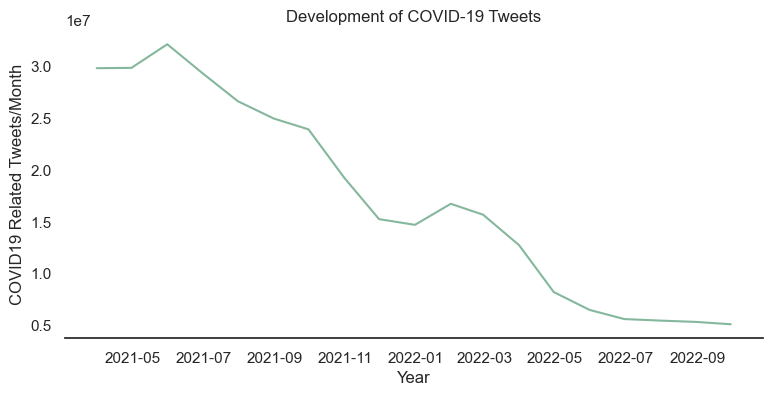

In [2]:
monthly_df, twitter_fig = query_monthly_twitter_absolute_results(search_string = "SARS-COV OR COVID-19 OR COVID19",
                                                                 search_nice_name = "COVID-19",
                                                                 search_akronym_for_graph ="COVID19",
                                                                 start_time = "2021-01-01T00:00:00Z",
                                                                 window_rolling_average = 3)

In [2]:
total_df, monthly_df = query_twitter_archive_for_numbers(query = "(digital health) OR (digital biomarker) OR (remote patient monitoring) OR (digital medicine) OR (digital health technology) OR (Digitale Gesundheitsanwendung) OR (telemedicine)", start_time = "2007-01-01T00:00:00Z")

In [3]:
total_df.to_csv("Data/Twitter_Rough_daily_df.csv", index=False)
monthly_df.to_csv("Data/Twitter_Rough_monthly_df.csv", index=False)

In [4]:
monthly_df

,month,tweet_count
0,2007-01-31,0
1,2007-02-28,0
2,2007-03-31,1
3,2007-04-30,1
4,2007-05-31,2
...,...,...
187,2022-08-31,86250
188,2022-09-30,71779
189,2022-10-31,90604
190,2022-11-30,147975


In [7]:
monthly_df.groupby(monthly_df.month.dt.year)["tweet_count"].sum()

month
2007         60
2008        506
2009      12007
2010      35474
2011      68840
2012     139643
2013     195944
2014     315633
2015     511316
2016     595334
2017     566056
2018     669567
2019     622068
2020    1374227
2021    1313897
2022    1135553
Name: tweet_count, dtype: int64

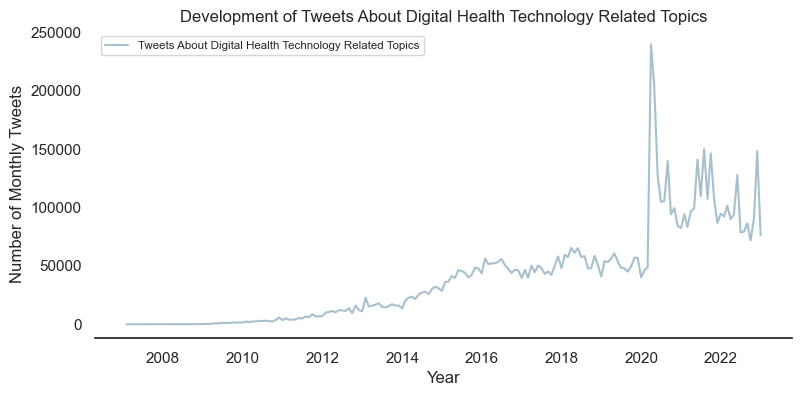

In [6]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = monthly_df.month, y= monthly_df.tweet_count,   
                    color ="#A8C0CB")
ax.legend(["Tweets About Digital Health Technology Related Topics"], fontsize = "x-small")
handles1=  ax.get_legend().legendHandles
plt.ylabel("Number of Monthly Tweets")
plt.xlabel("Year")
sns.despine(left = True)




plt.title("Development of Tweets About Digital Health Technology Related Topics")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/Digital_Biomarkers_Tweet_Overall_Publications.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()

## Time Series Experimentation

In [28]:
import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData


In [29]:
time_series_df = monthly_df[['start', 'tweet_count']]
time_series_df.columns = ["time","tweet_count"]


In [30]:
tsd = TimeSeriesData(time_series_df)

### Change detection

#### CUSUM

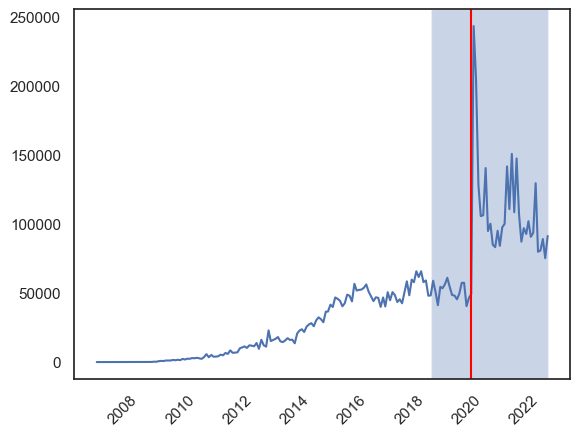

In [34]:
from kats.detectors.cusum_detection import CUSUMDetector
detector = CUSUMDetector(tsd)
change_points = detector.detector(change_directions=["increase"], interest_window = [140,190])
detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()


In [35]:
change_points

[CUSUMChangePoint(start_time: 2020-02-29 00:00:00, end_time: 2020-02-29 00:00:00, confidence: 1.0, direction: increase, index: 157, delta: 86269.40308544305, regression_detected: True, stable_changepoint: True, mu0: 24377.25316455696, mu1: 110646.65625, llr: 188.30154563514913, llr_int: 34.23291971895929, p_value: 0.0, p_value_int: 3.684817073690283e-08)]

#### Bayesian Online Change Point Detection (BOCPD)

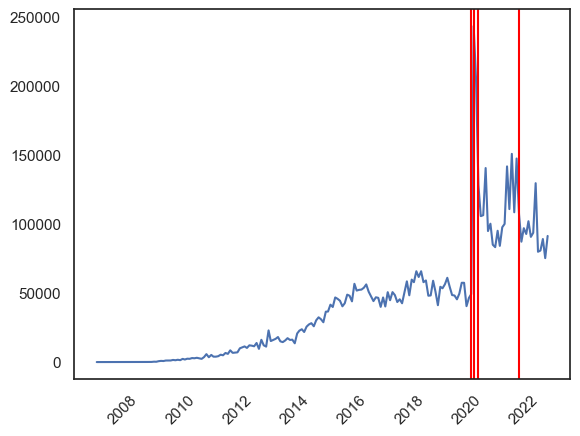

In [36]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

# Initialize the detector
detector = BOCPDetector(tsd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL # this is the default choice
)

# Plot the data
detector.plot(changepoints)
plt.xticks(rotation=45)
plt.show()


In [37]:
changepoints

[BOCPDChangePoint(start_time: 2020-02-29T00:00:00.000000000, end_time: 2020-02-29T00:00:00.000000000, confidence: 0.9899999933611086, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: tweet_count),
 BOCPDChangePoint(start_time: 2020-03-31T00:00:00.000000000, end_time: 2020-03-31T00:00:00.000000000, confidence: 0.9747537787045135, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: tweet_count),
 BOCPDChangePoint(start_time: 2020-05-31T00:00:00.000000000, end_time: 2020-05-31T00:00:00.000000000, confidence: 0.9720521071482489, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: tweet_count),
 BOCPDChangePoint(start_time: 2021-10-31T00:00:00.000000000, end_time: 2021-10-31T00:00:00.000000000, confidence: 0.676490690400289, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: tweet_count)]

#### RobustStatDetector - Moving AVerage

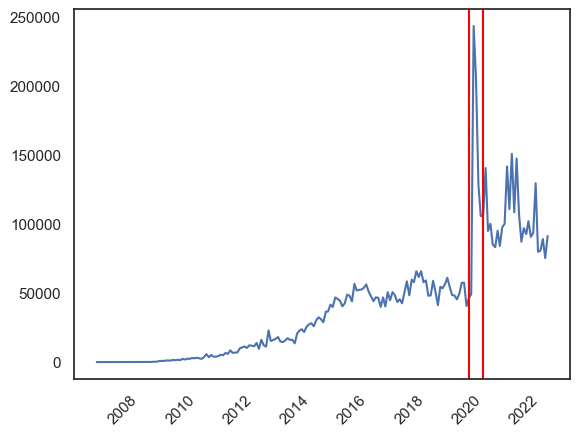

In [38]:
# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

detector = RobustStatDetector(tsd)
change_points = detector.detector()

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

### Trend Detection

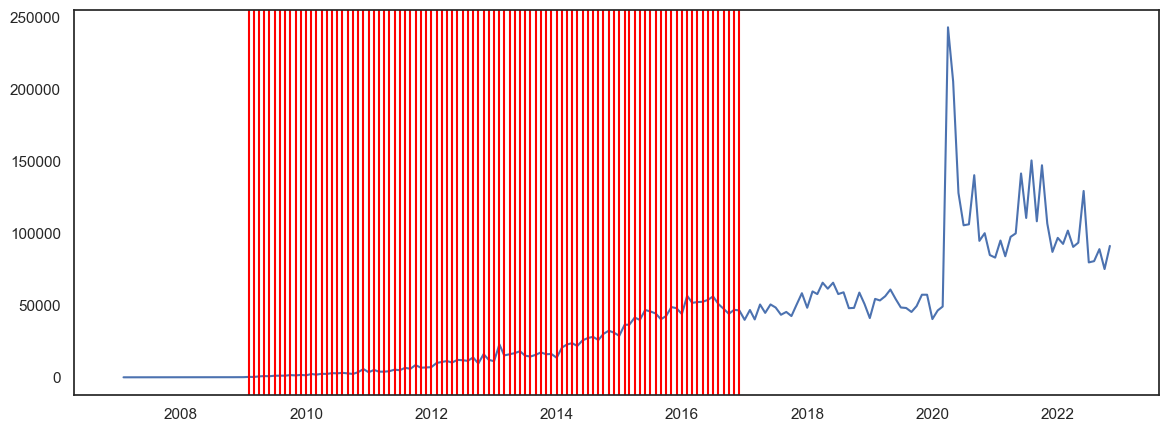

In [49]:
from kats.detectors.trend_mk import MKDetector

detector = MKDetector(data=tsd, threshold=0.9)
# run detector
detected_time_points = detector.detector( direction='up', window_size=24)
# plot the results
detector.plot(detected_time_points)
plt.show()

### Feature Analysis

In [52]:
from kats.tsfeatures.tsfeatures import TsFeatures
# Step 1. initiate TsFeatures
model = TsFeatures(spectral_freq=12, stl_period=12, nbins= 12, acfpacf_lag = 12, stl_features = True, seasonalities = True )

# Step 2. use .transform() method, and apply on the target time series data
output_features = model.transform(tsd)
output_features

{'length': 190,
 'mean': 38906.836842105266,
 'var': 1657580755.147064,
 'entropy': 0.4677205724295283,
 'lumpiness': 6.093792735025466e+17,
 'stability': 1327781781.0639613,
 'flat_spots': 2,
 'hurst': 0.09397304267626871,
 'std1st_der': 11760.195878712168,
 'crossing_points': 3,
 'binarize_mean': 0.4842105263157895,
 'unitroot_kpss': 0.49441128656947747,
 'heterogeneity': 90.73930318630559,
 'histogram_mode': 0.0,
 'linearity': 0.7272485697340767,
 'trend_strength': 0.8937375858881693,
 'seasonality_strength': 0.37720905289203366,
 'spikiness': 28228830387053.2,
 'peak': 11,
 'trough': 0,
 'level_shift_idx': 138,
 'level_shift_size': 9200.350000000006,
 'y_acf1': 0.8875811781293044,
 'y_acf5': 3.289178896949604,
 'diff1y_acf1': -0.21535507629947548,
 'diff1y_acf5': 0.12778638430030856,
 'diff2y_acf1': -0.5356136650465492,
 'diff2y_acf5': 0.3392085175620326,
 'y_pacf5': 0.9217545300827955,
 'diff1y_pacf5': 0.1831812089637703,
 'diff2y_pacf5': 0.7419395165041702,
 'seas_acf1': 0.679099

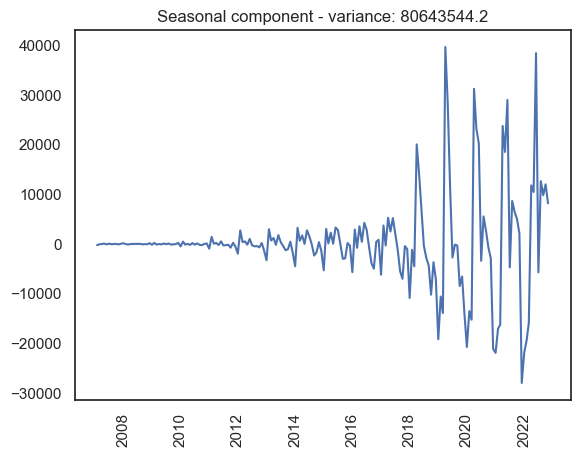

In [56]:
from statsmodels.tsa.seasonal import STL
import numpy as np

stl = STL(time_series_df.tweet_count.values, period=12)
res = stl.fit()
plt.plot(
    pd.to_datetime(time_series_df.time.values),
    res.seasonal
)
plt.xticks(rotation = 90);
plt.title(f'Seasonal component - variance: {np.round(np.var(res.seasonal), 2)}');
